<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/transfer_learning_feature_extraction(data_augmentation)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:09<00:00, 177MB/s]
100% 1.06G/1.06G [00:09<00:00, 124MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [47]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [48]:
conv_base.trainable = False

In [49]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [50]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
history = model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator)

<ipython-input-52-b2b64d53260b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 201s 317ms/step - loss: 0.3074 - accuracy: 0.8700 - val_loss: 0.2212 - val_accuracy: 0.9060
Epoch 2/10
625/625 [==============================] - 191s 306ms/step - loss: 0.2547 - accuracy: 0.8916 - val_loss: 0.2159 - val_accuracy: 0.9082
Epoch 3/10
625/625 [==============================] - 188s 300ms/step - loss: 0.2487 - accuracy: 0.8938 - val_loss: 0.2172 - val_accuracy: 0.9058
Epoch 4/10
625/625 [==============================] - 186s 297ms/step - loss: 0.2405 - accuracy: 0.8971 - val_loss: 0.2186 - val_accuracy: 0.9112
Epoch 5/10
625/625 [==============================] - 185s 296ms/step - loss: 0.2307 - accuracy: 0.9030 - val_loss: 0.2123 - val_accuracy: 0.9082
Epoch 6/10
625/625 [==============================] - 188s 301ms/step - loss: 0.2235 - accuracy: 0.9062 - val_loss: 0.2231 - val_accuracy: 0.9076
Epoch 7/10
625/625 [==============================] - 185s 296ms/step - loss: 0.2170 - accuracy: 0.9067 - val_loss: 0.2012 -

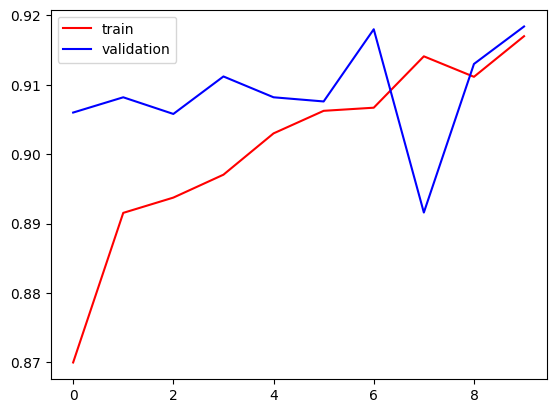

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

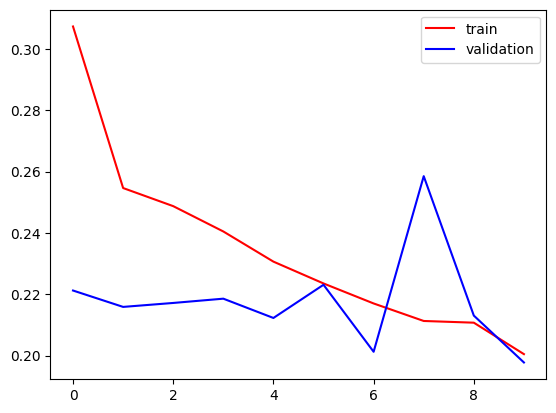

In [54]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [55]:
import cv2 as cv

In [59]:
cat_T = cv.imread('catnew.jpg')

# Resize the image to (150, 150) using OpenCV's resize function
cat_T_resized = cv.resize(cat_T, (150, 150))

# Reshape the resized image into a 4-dimensional array
cat = cat_T_resized.reshape(1, 150, 150, 3)

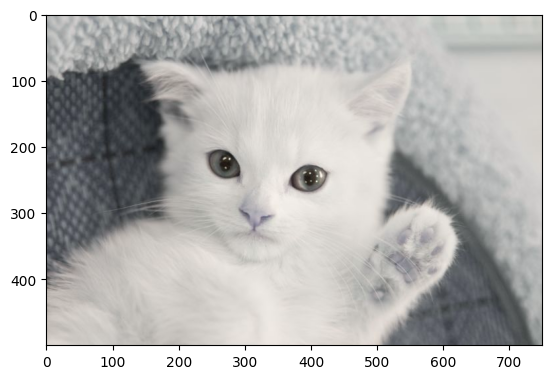

In [60]:
plt.imshow(cat_T)

In [61]:
model.predict(cat)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [71]:
cat_T = cv.imread('cat-10.jpg')

# Resize the image to (150, 150) using OpenCV's resize function
cat_T_resized = cv.resize(cat_T, (150, 150))

# Reshape the resized image into a 4-dimensional array
cat = cat_T_resized.reshape(1, 150, 150, 3)

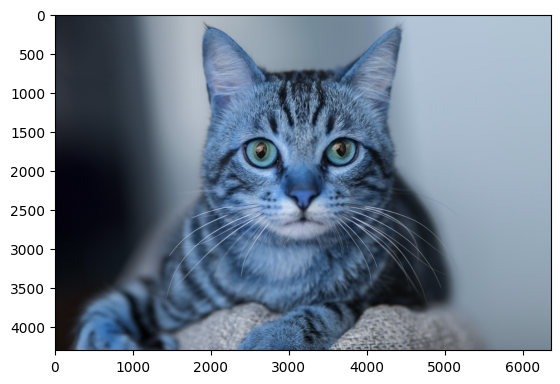

In [72]:
plt.imshow(cat_T)

In [73]:
model.predict(cat)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

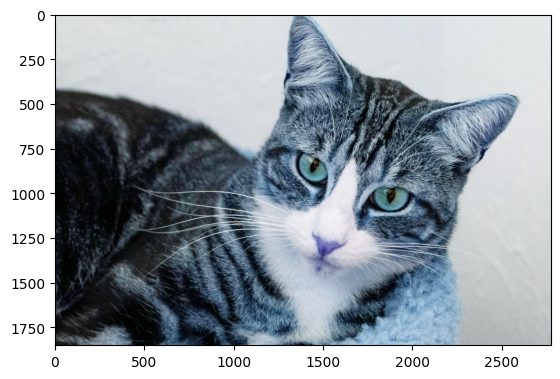

In [79]:
cat_T = cv.imread('cat-talk.jpg')

# Resize the image to (150, 150) using OpenCV's resize function
cat_T_resized = cv.resize(cat_T, (150, 150))

# Reshape the resized image into a 4-dimensional array
cat = cat_T_resized.reshape(1, 150, 150, 3)
plt.imshow(cat_T)

In [80]:
model.predict(cat)

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)

In [81]:
dog_T = cv.imread('pexels.webp')

# Resize the image to (150, 150) using OpenCV's resize function
dog_T_resized = cv.resize(dog_T, (150, 150))

# Reshape the resized image into a 4-dimensional array
dog = dog_T_resized.reshape(1, 150, 150, 3)

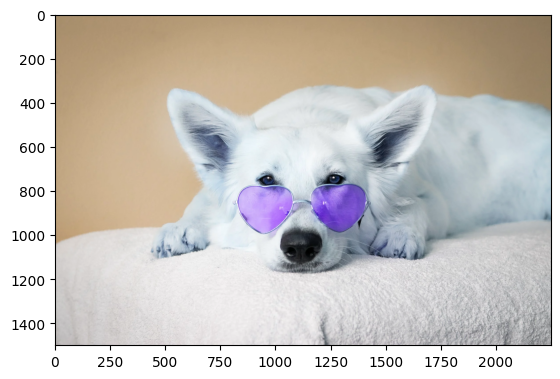

In [82]:
plt.imshow(dog_T)

In [83]:
model.predict(dog)

1/1 [==============================] - 0s 24ms/step


array([[1.]], dtype=float32)

In [84]:
dog_T = cv.imread('gettyimages.jpg')

# Resize the image to (150, 150) using OpenCV's resize function
dog_T_resized = cv.resize(dog_T, (150, 150))

# Reshape the resized image into a 4-dimensional array
dog = dog_T_resized.reshape(1, 150, 150, 3)

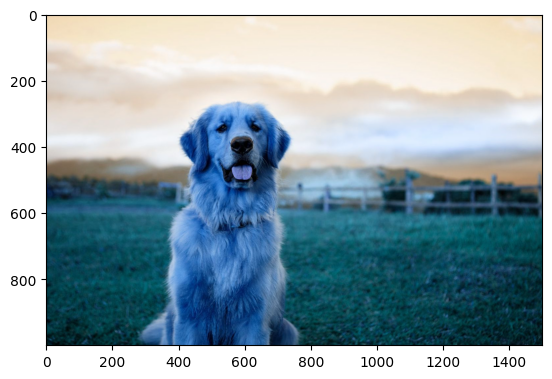

In [87]:
plt.imshow(dog_T)

In [86]:
model.predict(dog)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

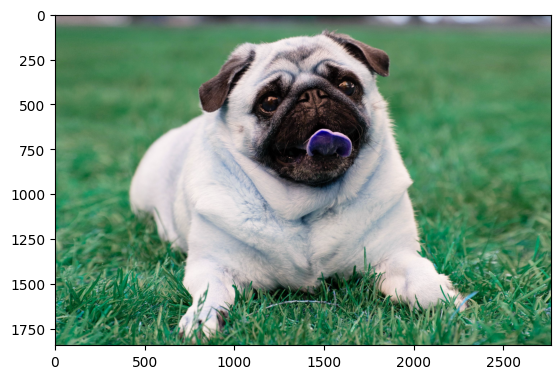

In [88]:
dog_T = cv.imread('chinese-dog-breeds.jpg')

# Resize the image to (150, 150) using OpenCV's resize function
dog_T_resized = cv.resize(dog_T, (150, 150))

# Reshape the resized image into a 4-dimensional array
dog = dog_T_resized.reshape(1, 150, 150, 3)
plt.imshow(dog_T)

In [89]:
model.predict(dog)

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)